In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [40]:
df = pd.read_csv(r"C:\Users\Rohan\Pictures\rohan\csv. file\INR-USD.csv",encoding='latin')

In [71]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Growth
0,2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0,2003,12,0.175904
1,2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0,2003,12,0.175904
2,2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0,2003,12,0.175904
3,2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0,2003,12,0.175904
4,2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0,2003,12,0.175904


In [41]:
df.shape

(1016, 7)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1016 non-null   object 
 1   Open       1013 non-null   float64
 2   High       1013 non-null   float64
 3   Low        1013 non-null   float64
 4   Close      1013 non-null   float64
 5   Adj Close  1013 non-null   float64
 6   Volume     1013 non-null   float64
dtypes: float64(6), object(1)
memory usage: 55.7+ KB


In [43]:
df.dropna(inplace=True)

In [46]:
df.duplicated().sum()

0

In [47]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.0
mean,58.035208,58.506681,57.654706,58.056509,58.056509,0.0
std,12.614635,12.716632,12.565279,12.657407,12.657407,0.0
min,38.995998,39.334999,38.979000,39.044998,39.044998,0.0
25%,45.508999,45.775002,45.231998,45.498001,45.498001,0.0
50%,59.702999,60.342999,59.209999,59.840000,59.840000,0.0
75%,68.508499,69.099998,68.250000,68.538002,68.538002,0.0
max,82.917999,83.386002,82.563004,82.932999,82.932999,0.0


In [51]:
figure = px.line(df, x="Date", 
                 y="Close", 
                 title='USD - INR Conversion Rate over the years')
figure.show()

In [57]:
df["Date"] = pd.to_datetime(df["Date"], format = '%Y-%m-%d')
df['Year'] = df['Date'].dt.year
df["Month"] = df["Date"].dt.month
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0,2003,12
1,2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0,2003,12
2,2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0,2003,12
3,2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0,2003,12
4,2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0,2003,12


In [59]:
import plotly.graph_objs as go
import plotly.io as pio

# Calculate yearly growth
growth = df.groupby('Year').agg({'Close': lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0]*100})

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth['Close'],
                     name='Yearly Growth'))

fig.update_layout(title="Yearly Growth of USD - INR Conversion Rate",
                  xaxis_title="Year",
                  yaxis_title="Growth (%%)",
                  width=900,
                  height=600)

pio.show(fig)

In [60]:
df['Growth'] = df.groupby(['Year', 'Month'])['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Group data by Month and calculate average growth
grouped_data = df.groupby('Month').mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data['Month'],
    y=grouped_data['Growth'],
    marker_color=grouped_data['Growth'],
    hovertemplate='Month: %%{x}<br>Average Growth: %%{y:.2f}%%<extra></extra>'
))

fig.update_layout(
    title="Aggregated Monthly Growth of USD - INR Conversion Rate",
    xaxis_title="Month",
    yaxis_title="Average Growth (%%)",
    width=900,
    height=600
)

pio.show(fig)

C:\Users\Rohan\AppData\Local\Temp\ipykernel_5884\1493077404.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 640x480 with 0 Axes>

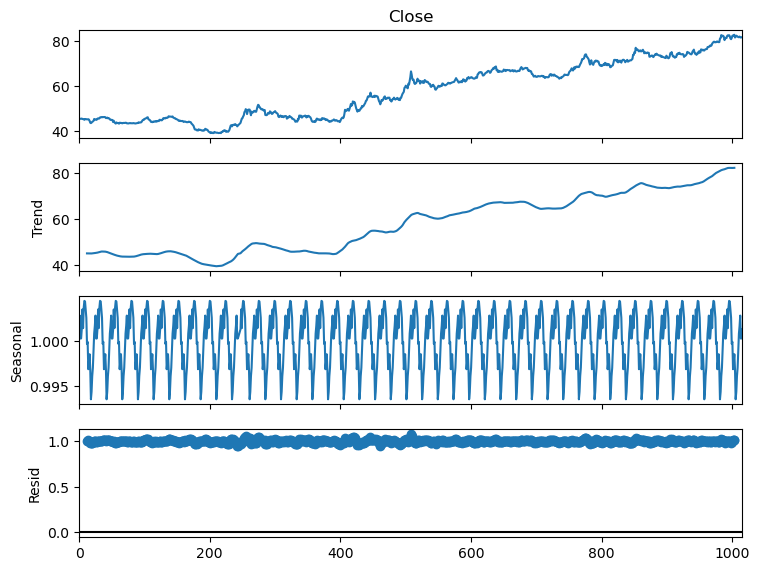

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], model='multiplicative', period=24)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(8, 6)
fig.show()

In [63]:
from pmdarima.arima import auto_arima
model = auto_arima(df['Close'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

(2, 1, 0)


In [64]:
p, d, q = 2, 1, 0
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df["Close"], order=(p, d, q), 
                seasonal_order=(p, d, q, 52))  
fitted = model.fit() 
print(fitted.summary())


C:\Users\Rohan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Rohan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1013
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -905.797
Date:                            Sun, 31 Mar 2024   AIC                           1821.594
Time:                                    00:14:46   BIC                           1845.929
Sample:                                         0   HQIC                          1830.861
                                           - 1013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.026      1.193      0.233      -0.020       0.083
ar.L2          0.0643      0.026   

In [69]:
predictions = fitted.predict(len(df), len(df)+100)
print(predictions)


C:\Users\Rohan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Rohan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



1013    81.732806
1014    81.886991
1015    82.180318
1016    82.607756
1017    82.474245
          ...    
1109    87.194937
1110    87.249949
1111    87.383557
1112    87.652232
1113    87.407013
Name: predicted_mean, Length: 101, dtype: float64


In [70]:
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title="INR Rate - Training Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend_title="Data",
    width=900,
    height=600
)

pio.show(fig)
